# Review

# Differential Equations

* A differential equation is an equation that involves the derivative of an unknown function.
* The general form for a first order (involving the first-order derivative of the unknown function) is
$$x'(t)=f(t, x(t))$$

## Solving a DE using sympy

* `dsolve(eq)` solve a differential equation `eq` that involves the derivative of an unknown function
* An unknown function may be constructed using the constructor `Function(name)`

## Initial condition
To find a solution, we need a value of the solution at a given time $t=t_0$, namely, $x_0=x(t_0)$, this is called an **initial condition**.

The initial condition is given as a python dict, to the **ics** argument. Let us assume that the population size at time $t=0$ is $N$, i.e., $x(0)=N$.

# Equilibrium

An equilibrium of the differential equation is a constant solution. 

We have seen them in difference equations
* Example: for the difference equation, $x_{t+1}=f(x_t)$, an equilibrium $x_t=x^*$ must satisfy $x^*=f(x^*)$

For a differential equation $x'(t)=f(x(t))$, i.e., $x'=f(x)$, 
* note that here the right hand side does note explicitly depend on the time $t$.
* An equilibrium, i.e., a constant solution $x(t)=x^*$, must satisfy
$(x^*)'=0=f(x^*)$
That is, $$f(x^*)=0$$
is the sufficient and necessary condition that an equilibrium must satisfy.

## Example: the logistic model revisited
$$x'=rx\left(1-\frac{x}{K}\right)$$
The equilibria must satisfy
$$rx\left(1-\frac{x}{K}\right)=0$$
We can solve them using the solve function:

In [2]:
from sympy import *

x = Function("x")
t, r, K = symbols("t, r, K", positive=True)
logistic = Eq(diff(x(t), t), r*(1-x(t)/K)*x(t))
display(logistic)

Eq(Derivative(x(t), t), r*(1 - x(t)/K)*x(t))

In [3]:
# the right hand side fo the equation is in .args[1]
RHS = logistic.args[1]
display(RHS)

solve(RHS, x(t))

r*(1 - x(t)/K)*x(t)

[0, K]

There are two equilibrium: $x(t)=0$, and $x(t)=K$.

# System of Differential Equations

Sometimes, a system state must be described with multiple variables, each one is governed by a differential equation. That is, these systems are defined by a system of differential equationa.

Let us consider the following system that gives a damped oscillation
\begin{align*}
x'(t)&=-rx(t)+y(t)\\
y'(t)&=x(t)-ry(t)
\end{align*}

In [13]:
y=Function("y")
dsolve([Eq(diff(x(t), t), -r*x(t)+y(t)), Eq(diff(y(t),t), -x(t)-r*y(t))], [x(t), y(t)])

[Eq(x(t), C1*exp(-r*t)*sin(t) + C2*exp(-r*t)*cos(t)),
 Eq(y(t), C1*exp(-r*t)*cos(t) - C2*exp(-r*t)*sin(t))]



# Example: The SIRS model
The following model is a modification to the SIR model, incorporating a temporary acquired immunity. Each recovered individual loses immunity at a rate $\rho$ and becomes susceptible.
\begin{align*}
S'&=-\beta SI +\rho R\\
I'&=\beta SI-\gamma I\\
R'&=\gamma I-\rho R
\end{align*}

In fact, since $S+I+R=1$ is the total fraction, the $R$ equation can be derived from the $S$ and $I$ equations. So, we only need to consider the $S$ and $I$ equations with $R=1-S-I$.
\begin{align*}
S'&=-\beta SI +\rho (1-S-I)\\
I'&=\beta SI-\gamma I\\
\end{align*}

Unfortunately, this system is not solvable, i.e., it has solutions, but there is no formula. We want to know if the system has a constant solution, i.e., an equiliubrium.


In [71]:
from sympy.abc import S, I
beta, gamma, rho = symbols("beta, gamma, rho", positive=True)

dS = -beta*S*I+rho*(1-S-I)
dI = beta*S*I-gamma*I

eq=nonlinsolve([dS, dI], [S, I])
eq

{(1, 0), (-(-rho + rho*(beta - gamma)/beta)/rho, rho*(beta - gamma)/(beta*(gamma + rho)))}

In [72]:
# is the second equilibrium biologically meaningful, i.e., nonnegative?
# We can simplify the S component of the second equilibrium
simplify(eq.args[1][0])

gamma/beta

# Numerical evaluation
There are two approachs to evaluate an expression numerically
* Use the `subs` method to substitute a float value to a symbol

In [73]:
e = S+I
v=e.subs({S:1.1, I:2})
v

3.10000000000000

## Problem
* The value 3.1 that we get is not a float point number that Python can use for numerical calculations. 

In [74]:
type(v)

sympy.core.numbers.Float

In [75]:
from numpy import cos as Cos
Cos(v)

TypeError: loop of ufunc does not support argument 0 of type Float which has no callable cos method

## Convert a sympy number to a real number
We need to convert the sympy values to a float point value or an integer

In [76]:
print("v=", float(v), "cos(v)=", Cos(float(v)))

v= 3.1 cos(v)= -0.9991351502732795


# The lambdify function
`lambdify(vars, e)` creates a lambda function from an expression
* vars are the arugments, and e is the expression

In [77]:
f = lambdify([S, I], e)
f(2, 2)

4

## Example

Assume that a recovered individual loses immunity after 90 days, i.e., $\rho=1/90$, the mean infectious period is 5 days, i.e., $\gamma=0.1$, how does the equilibrium value of $I$ change with $\beta$ for $\beta\in[0.1, 0.4]$?


(-(-rho + rho*(beta - gamma)/beta)/rho, rho*(beta - gamma)/(beta*(gamma + rho)))

rho*(beta - gamma)/(beta*(gamma + rho))

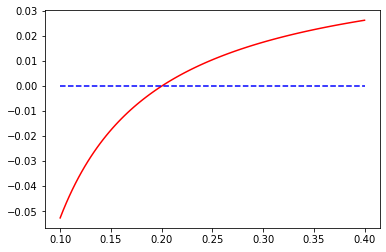

In [78]:
# Get the second equilibrium
eq1 = eq.args[1]
display(eq1)

# get the I component
eqI = eq1[1]
display(eqI)

# Make eqI an lambda function
f=lambdify((beta, gamma, rho), eqI)

from numpy import linspace, zeros
b = linspace(0.1, 0.4, 100)

rho = 1/90
gamma = 0.2
from matplotlib.pyplot import plot
plot(b, f(b, gamma, rho), "-r", b, zeros(len(b)), "--b")

# Stability

Like the equilibrium of a difference equation, the stability of an equilibrium of a differential equation determines if the system remains close to the equilibrium after a small perturbation.
* Stable: remains close
* Asymptotically stable: stable, and the solution after a small perturbation eventually approaches the equilibrium
* Unstable: the solution eventually moves away from the equilibrium

## Theorem:
Consider a system of differential equations $x'=f(x)$, $x(t)=x^*$ is an equilibrium, i.e., $f(x^*)=0$. Here $f(x)$ is continuously differentiable. $J=Df(x^*)$ is the Jacobian matrix of $f(x)$ evaluated at $x^*$, i.e.,
$$
J=\left[\begin{array}{cccc}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} &\cdots & \frac{\partial f_1}{\partial x_n}\\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} &\cdots & \frac{\partial f_2}{\partial x_n}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} &\cdots & \frac{\partial f_n}{\partial x_n}
\end{array}
\right]_{x=x^*}
$$
Then, 
* $x^*$ is asymptotically stable if all eigenvalues of $J$ have negative real parts.
* $x^*$ is unstable if one eigenvalue of $J$ has a positive real part.

## Example: the SIRS model revisited

Note that we can use symbolic differentiation to calculate the Jacobian matrix

### Matrix
The **Matrix** class represents a matrix. Like the construction of a matrix in numpy using array, it takes an array of arrays (each is a row).

In [79]:
Df = Matrix([[diff(dS, S), diff(dS, I)], [diff(dI, S), diff(dI, I)]])
Df

Matrix([
[-I*beta - rho,  -S*beta - rho],
[       I*beta, S*beta - gamma]])

In [84]:
# Evaluate at the equilibrium
J=simplify(Df.subs({S:eq1[0], I:eq1[1]}))
J

Matrix([
[ -rho*(beta + rho)/(gamma + rho), -gamma - rho],
[rho*(beta - gamma)/(gamma + rho),            0]])

## The eigenvalus

The **.eigenvals** method of a Matrix object calculates the eigenvalues sympolically.
* It takes a no arguments
* It returns a dict of eigenvalues and their multiplicity

In [85]:
E=J.eigenvals()
E

{-sqrt(rho)*sqrt(beta**2*rho - 4*beta*gamma**2 - 8*beta*gamma*rho - 2*beta*rho**2 + 4*gamma**3 + 8*gamma**2*rho + 4*gamma*rho**2 + rho**3)/(2*(gamma + rho)) - rho*(beta + rho)/(2*(gamma + rho)): 1,
 sqrt(rho)*sqrt(beta**2*rho - 4*beta*gamma**2 - 8*beta*gamma*rho - 2*beta*rho**2 + 4*gamma**3 + 8*gamma**2*rho + 4*gamma*rho**2 + rho**3)/(2*(gamma + rho)) - rho*(beta + rho)/(2*(gamma + rho)): 1}

In [86]:
es = list(E.keys())
display(es[0], es[1])

-sqrt(rho)*sqrt(beta**2*rho - 4*beta*gamma**2 - 8*beta*gamma*rho - 2*beta*rho**2 + 4*gamma**3 + 8*gamma**2*rho + 4*gamma*rho**2 + rho**3)/(2*(gamma + rho)) - rho*(beta + rho)/(2*(gamma + rho))

sqrt(rho)*sqrt(beta**2*rho - 4*beta*gamma**2 - 8*beta*gamma*rho - 2*beta*rho**2 + 4*gamma**3 + 8*gamma**2*rho + 4*gamma*rho**2 + rho**3)/(2*(gamma + rho)) - rho*(beta + rho)/(2*(gamma + rho))

It is not straightforward to to determine the sign of the real parts. The following theorem may help.

## Theorem
All the eigenvalues of a $2\times2$ matrix $J$ have negative real parts if and only if $trace(J)<0$ and $det(J)>0$.

In [109]:
J.trace()

-rho*(beta + rho)/(gamma + rho)

In [111]:
simplify(J.det())

rho*(beta - gamma)

Thus, the second equilibrium is asymptotically stable if and only if $\beta>\gamma$, which is the same condition as the equilibrim is positive.